# Star Wars Data Clean

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

import re
import json


## Cleaning Raw Data



### Episode 2

In [25]:
filename = './data/02_star_wars_raw.txt'

with open(filename, 'r') as raw_file:
    raw_lines = raw_file.readlines()

print(f'Lines {len(raw_lines)}')

Lines 5493


In [26]:
paragraphs = dict()

paragraph_num = 1
paragraphs[paragraph_num] = dict()
paragraphs[paragraph_num]['lines'] =list()

for line in raw_lines:
    if line == '\n':
        paragraph_num += 1
        paragraphs[paragraph_num] = dict()
        paragraphs[paragraph_num]['lines'] =list()
    else:
        paragraphs[paragraph_num]['lines'].append(line.replace('\n', '').replace('\t', '').replace('�', 'E'))
        
for p_num, content in paragraphs.items():
    print(f'****** {p_num} ({len(content)}) *****')
    print(content['lines'])
    if p_num > 20:
        break
    

****** 1 (1) *****
['EXT. SPACE', 'A vast sea of stars severas as a backdrop for the Main Title, following by a rollup, whcih crawls into infinity.']
****** 2 (1) *****
['There is unrest in the Galactic Senate', 'Several hundred solar systems under', 'the leadership of the rebel leader, Count', 'Dooku, have decalred their intentions to', 'secede from the Republic.']
****** 3 (1) *****
['This separatist movement has made it', 'difficult for the limited number of', 'Jedi Kights to maintain peace and', 'order in the galaxy.']
****** 4 (1) *****
['Senator Amidala, the former Queen of', 'Naboo, is returning to Coruscant', 'to vote on the critical issue', 'of creating an army to assist the', 'overwhelmed Jedi.']
****** 5 (1) *****
['PAN UP to reveal the amber city planet of Coruscant. A yellow Naboo Fighter flies OVER CAMERA toward the planet, followed by a large Royal Cruiser and two more Fighters.']
****** 6 (1) *****
['EXT. CITYSCAPE, CORUSCANT - DAWN', 'The ships skim across the surface 

In [37]:
save_json = True
if save_json:
    filename = './output/paragraphs.json'
    with open(filename, 'w') as json_file:
        json.dump(paragraphs, json_file)

In [43]:
actor_regexp = re.compile(r'(([A-Z\-]+)\s?([A-Z\-]+)?)')
actor_lines = dict()
#print(paragraphs[161])
for p_num, content in paragraphs.items():
    #actor_lines[p_num]['actor'] = ''
    if len(content['lines']) >0:
        match = actor_regexp.match(content['lines'][0])
        if match and len(content['lines']) > 1:
            actor_lines[p_num]= dict()
            actor_lines[p_num]['actor'] = match.group(1)
            actor_lines[p_num]['lines'] = content['lines'].copy()
            actor_lines[p_num]['lines'].pop(0)
            #print(f'========= {p_num} {actor_lines[p_num]["actor"]} =====')
            #print(actor_lines[p_num]['lines'])
        else:
            print(f'>>> {p_num}')
            #print(content['lines'])
            #print('>>>'*60)
    else:
        print(f'>>>> Paragraph {p_num} is empty')
        #print(content['lines'])
        


>>> 5
>>> 8
>>> 9
>>> 11
>>> 12
>>> 13
>>> 15
>>> 17
>>> 19
>>> 22
>>> 24
>>> 28
>>> 30
>>> 32
>>> 36
>>> 39
>>> 44
>>> 46
>>> 48
>>> 50
>>> 59
>>> 64
>>> 67
>>> 72
>>> 76
>>> 86
>>> 91
>>> 93
>>> 95
>>> 100
>>> 103
>>> 106
>>> 110
>>> 114
>>> 116
>>> 118
>>> 120
>>> 126
>>> 135
>>> 138
>>> 153
>>> 156
>>> 159
>>> 161
>>> 173
>>> 187
>>>> Paragraph 190 is empty
>>> 191
>>> 192
>>> 196
>>> 201
>>> 205
>>> 209
>>> 212
>>> 215
>>> 217
>>> 220
>>> 223
>>> 228
>>> 231
>>> 233
>>> 238
>>> 242
>>> 247
>>> 251
>>> 253
>>> 259
>>> 264
>>> 265
>>> 266
>>> 267
>>> 268
>>> 270
>>> 271
>>> 272
>>> 273
>>> 277
>>> 280
>>> 283
>>> 288
>>> 299
>>> 302
>>> 303
>>> 305
>>> 308
>>> 311
>>> 312
>>> 313
>>> 314
>>> 315
>>> 317
>>> 322
>>> 328
>>> 330
>>> 331
>>> 338
>>> 341
>>> 355
>>> 361
>>> 364
>>> 367
>>> 369
>>> 372
>>> 377
>>> 380
>>> 386
>>> 390
>>> 397
>>> 400
>>> 404
>>> 412
>>> 415
>>> 419
>>> 424
>>> 426
>>> 428
>>> 431
>>> 435
>>> 437
>>> 448
>>> 450
>>> 453
>>> 455
>>> 459
>>> 462
>>> 464
>>> 

In [51]:
df_dict = dict()
df_dict['Paragraph'] = list()
df_dict['Character'] = list()
df_dict['Dialogue'] = list()
for p_num, content in actor_lines.items():
    df_dict['Paragraph'].append(p_num)
    df_dict['Character'].append(content['actor'])
    df_dict['Dialogue'].append(' '.join(content['lines']))
    

In [52]:
df = pd.DataFrame.from_dict(df_dict)
df.head()

,Paragraph,Character,Dialogue
0,1,EXT,A vast sea of stars severas as a backdrop for ...
1,2,T,Several hundred solar systems under the leader...
2,3,T,difficult for the limited number of Jedi Kight...
3,4,S,"Naboo, is returning to Coruscant to vote on th..."
4,6,EXT,The ships skim across the surface of the city ...


In [78]:
condition = (df['Character'] == 'EXT') | (df['Character'] == 'INT') | (df['Character'] == 'H')
df.drop(df[condition].index, inplace=True)

df['Character'] = df['Character'].str.strip()

<AxesSubplot:>

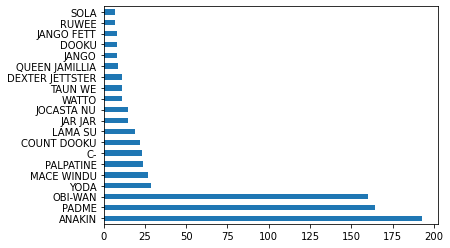

In [79]:
df['Character'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

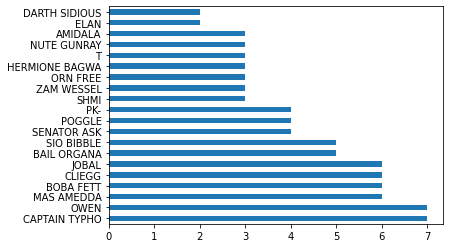

In [81]:
df['Character'].value_counts()[20:40].plot(kind='barh')

<AxesSubplot:>

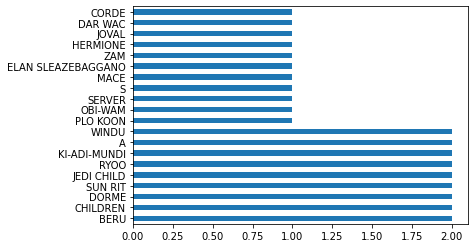

In [82]:
df['Character'].value_counts()[40:60].plot(kind='barh')